In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in  
# Necessary to display plots in notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats # Stats API 
import matplotlib.pyplot as plt # Plotting API
import seaborn as sns 
sns.set(style='whitegrid', palette='colorblind')
from IPython.core.display import display, HTML # Allows to print HTML tables
import warnings # Necessary to ignore warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [28]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Return the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [29]:
df['Rings'] = df['Rings'].astype('int32')
float_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
for col in float_cols:
    df[col] = df[col].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float32
 2   Diameter        4177 non-null   float32
 3   Height          4177 non-null   float32
 4   Whole weight    4177 non-null   float32
 5   Shucked weight  4177 non-null   float32
 6   Viscera weight  4177 non-null   float32
 7   Shell weight    4177 non-null   float32
 8   Rings           4177 non-null   int32  
dtypes: float32(7), int32(1), object(1)
memory usage: 163.3+ KB


The info() method prints information about the DataFrame

In [30]:
df.Sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

We can confirm, sex only has 3 categories, mainly - Male, Female and Infant, with Male being the most frequent of them. Let's see their density, to understand by how much is Male greater than Female and Infant in this dataset

In [72]:
df.Sex.value_counts(normalize=True).sort_index()

F    0.312904
I    0.321283
M    0.365813
Name: Sex, dtype: float64

So, their is significant more males than other two categories, let's visualize since Female and Infant are really close by using relative density to get a sense of their differences.

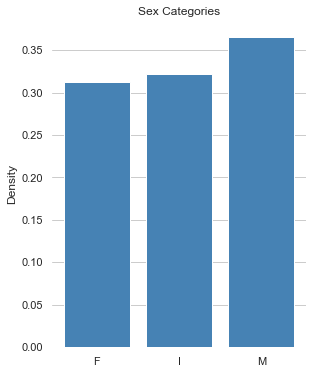

In [32]:
df_sex_category = df.Sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="steelblue",align="center")
axes1.set_xticks(x)
# Set x axis tick labels
axes1.set_xticklabels(df_sex_category.axes[0])
# Set x and y axis chart label
axes1.set_title("Sex Categories")
axes1.set_ylabel("Density")
axes1.xaxis.grid(False)
# Remove all of the axis tick marks
axes1.tick_params(bottom=False, top=False, left=False, right=False)
# Hide all of the spines
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major");



In [33]:
df.Length.describe()

count    4177.000000
mean        0.523992
std         0.120092
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

The describe() function computes a summary of statistics pertaining to the DataFrame columns

In [34]:


def calculate_tukey_five(data):
    min, q1, q2, q3, max = np.concatenate(
        [[np.min(data)], stats.mstats.mquantiles(data, [0.25, 0.5, 0.75]), [np.max(data)]])
    data = {"Min": min, "Q1": q1, "Q2": q2, "Q3": q3, "Max": max}
    return data

def calculate_tukey_dispersion(five):
    data = {
        "Range": five["Max"] - five["Min"],
        "IQR": five["Q3"] - five["Q1"],
        "QCV": (five["Q3"] - five["Q1"]) / five["Q2"]
    }
    return data

def display_dict(m, precision=3):
    table = "<table>"
    for item in m.items():
        table += ("<tr><th>{0}</th><td>{1:." +
                  str(precision) + "f}</td></tr>").format(*item)
    table += "</table>"
    return display(HTML(table))

data = calculate_tukey_five(df.Length)
data_dict = calculate_tukey_dispersion(data)

display_dict(data_dict)



Range,0.740
IQR,0.165
QCV,0.303


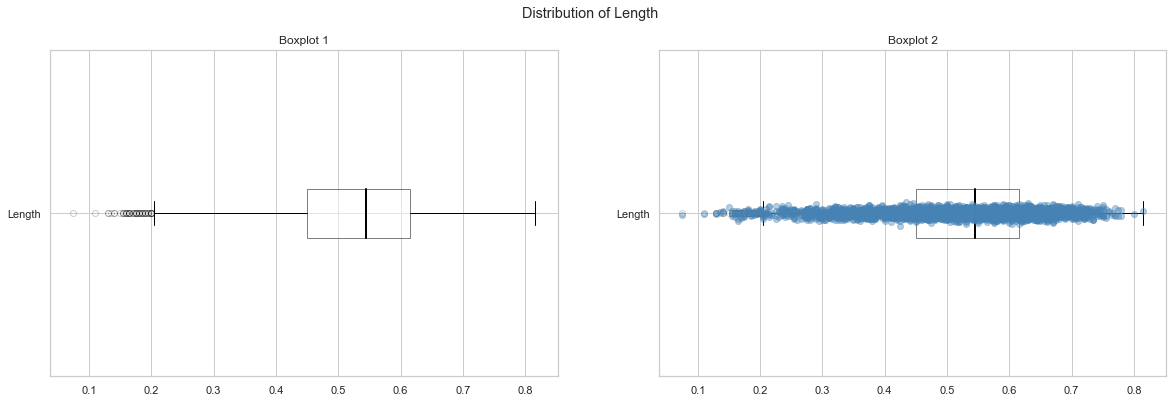

In [35]:


def restyle_boxplot(patch):
    # change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    # change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    # change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    # change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)

def numeric_boxplot(numeric_df, label, title):
    figure = plt.figure(figsize=(20, 6))
    # Add Main Title
    figure.suptitle(title)
    # Left side: Boxplot 1
    axes1 = figure.add_subplot(1, 2, 1)
    patch = axes1.boxplot(numeric_df, labels=[label], vert=False, showfliers = True, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes1.set_title('Boxplot 1')
    # Right side: Boxplot 2
    axes2 = figure.add_subplot(1, 2, 2)
    patch = axes2.boxplot(numeric_df, labels=[label], vert=False, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes2.set_title('Boxplot 2')
    y = np.random.normal(1, 0.01, size=len(numeric_df))
    axes2.plot(numeric_df, y, 'o', color='steelblue', alpha=0.4, zorder=2)
    plt.show()
    plt.close()

numeric_boxplot(df.Length, 'Length', 'Distribution of Length')

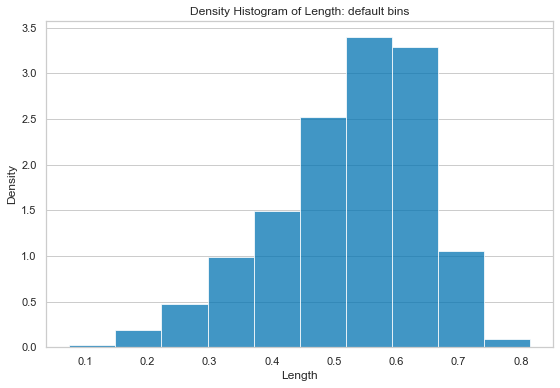

In [36]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 2)
axes.hist(df.Length, density=True, alpha=0.75)
axes.set_title("Density Histogram of Length: default bins")
axes.set_ylabel("Density")
axes.set_xlabel("Length")
axes.xaxis.grid(False)
plt.show()
plt.close()

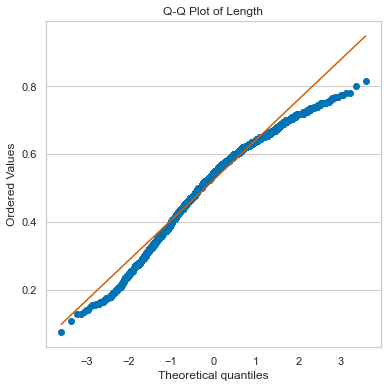

In [37]:


figure = plt.figure(figsize=(6, 6))
axes = figure.add_subplot(1, 1, 1)
stats.probplot(df.Length, dist="norm", plot=axes)
axes.set(title="Q-Q Plot of Length")
axes.xaxis.grid(False)
plt.show()
plt.close()



We can see a left skewed normal like shape, let's see if the distribution is good match with normal with QQ-plots.

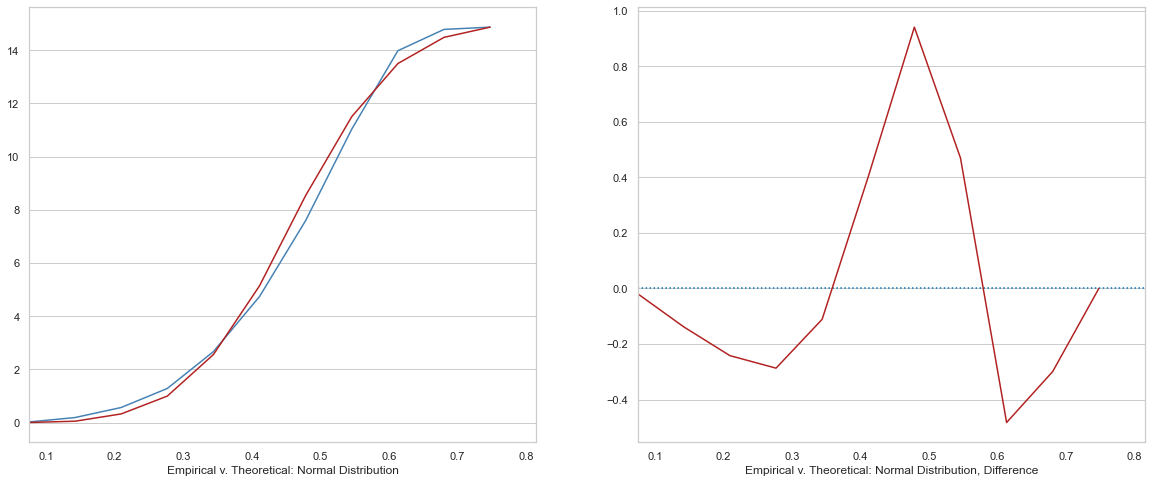

In [38]:


def cdf_plot(numeric_df):
    figure = plt.figure(figsize=(20, 8))

    mn = np.min(numeric_df)
    mx = np.max(numeric_df)
    mean = np.mean(numeric_df)
    std = np.std(numeric_df)

    axes = figure.add_subplot(1, 2, 1)

    values, base = np.histogram(numeric_df, bins=11, density=True)
    cumulative = np.cumsum(values)
    axes.plot(base[:-1], cumulative, color="steelblue")
    axes.set_xlim((mn, mx))

    sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
    values2, base = np.histogram(sampled_data, bins=base, density=True)
    cumulative2 = np.cumsum(values2)
    axes.plot( base[:-1], cumulative2, color="firebrick")
    axes.set_xlim((np.min(df.Length), np.max(df.Length)))
    axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
    axes.xaxis.grid(False)
    
    axes = figure.add_subplot(1, 2, 2)

    differences = cumulative2 - cumulative
    axes.plot(base[:-1], differences, color='firebrick')
    axes.set_xlim((mn, mx))
    axes.hlines(0, 0, 14000, linestyles="dotted")
    axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
    axes.xaxis.grid(False)
    plt.show()
    plt.close()
    
cdf_plot(df.Length)





We can see values almost fit perfect and can be modeled with normal, but we need to be aware of the difference plot where we can see big difference near middle, beginning and tail regions.


In [73]:
df.Height.describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

The describe() function computes a summary of statistics pertaining to the DataFrame columns.

In [75]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Weight diff
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,0.0205
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,-0.3025


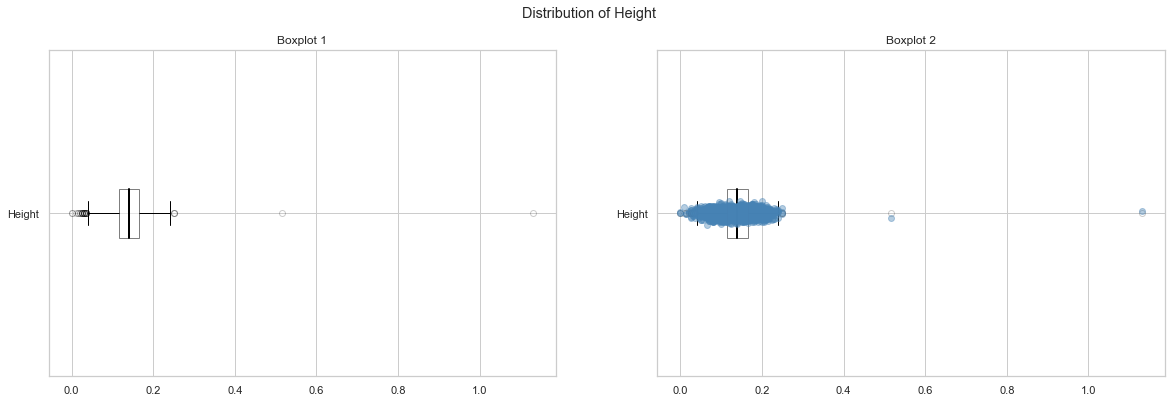

In [41]:
numeric_boxplot(df.Height, 'Height', 'Distribution of Height')

In [44]:
df[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']].describe()

,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.828743,0.359368,0.180593,0.238831
std,0.490389,0.221963,0.109614,0.139202
min,0.002000,0.001000,0.000500,0.001500
25%,0.441500,0.186000,0.093500,0.130000
50%,0.799500,0.336000,0.171000,0.234000
75%,1.153000,0.502000,0.253000,0.329000
max,2.825500,1.488000,0.760000,1.005000


0.0883961104956556
1
0.039243001026755736
1
0.019826409023174483
1
0.024713158187016
1


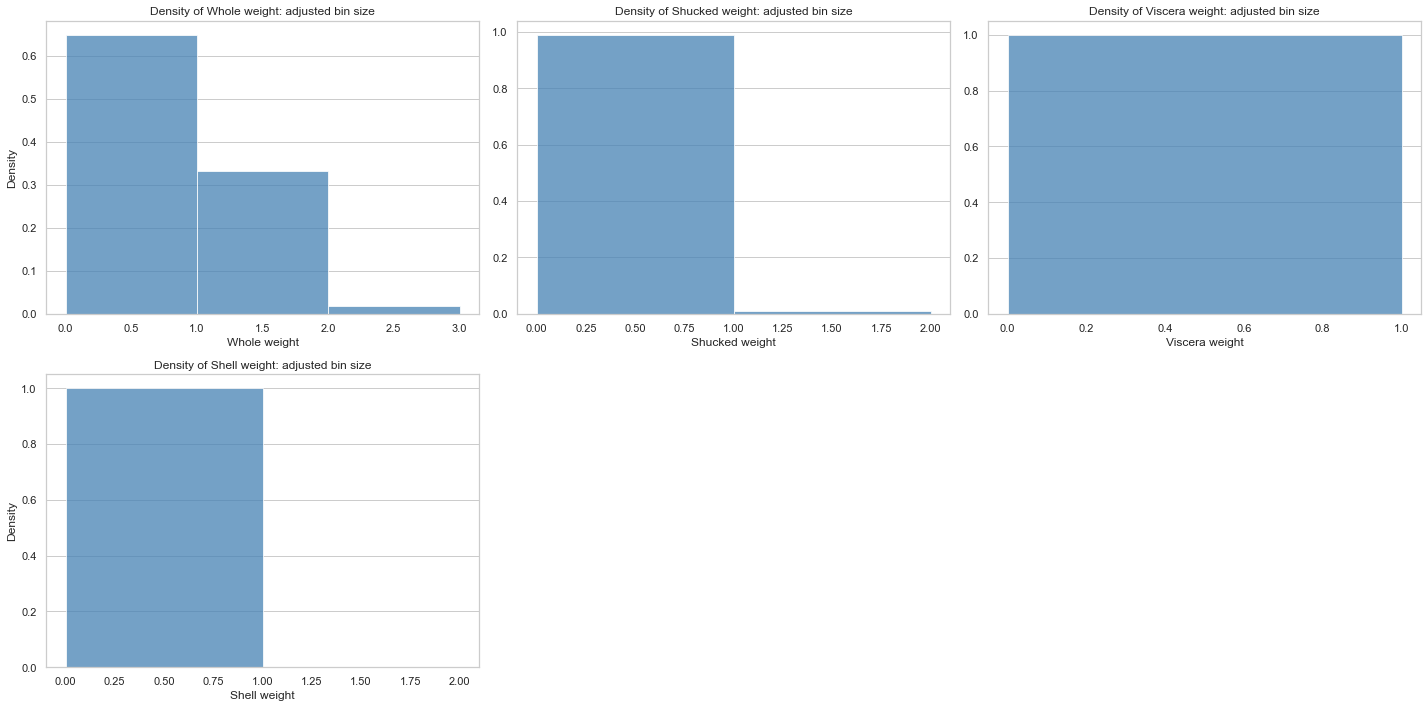

In [49]:
import math

# I am trying out freeman diaconis rule to find optimal binwidth as it is less sensitive to outliers in data
# Reference: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles(data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    n = len(data)
    h = 2.0 * (iqr/n**(1.0/3.0))
#     print(h)
    return math.ceil(h)

weights = ['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
figure = plt.figure(figsize=(20, 10))
for i, k in enumerate(weights):
    axes = figure.add_subplot(2, 3, i + 1)
    subdata = df[k]
    binwidth = freeman_diaconis(subdata)
#     print(binwidth)
    bins = np.arange(min(subdata), max(subdata) + binwidth)
    axes.hist(subdata, color="steelblue", bins=bins, density=True, alpha=0.75)
    axes.xaxis.grid(False)
    axes.set_title("Density of {}: adjusted bin size".format(k))
    if (i % 3 == 0):
        axes.set_ylabel("Density")
    axes.set_xlabel(k)
plt.tight_layout()



In [50]:


# Create weight-diff feature
df['Weight diff'] = df['Whole weight'] - (df['Shell weight'] + df['Shucked weight'] + df['Viscera weight'])
df['Weight diff'].describe()



count    4177.000000
mean        0.049950
std         0.058072
min        -0.447500
25%         0.018000
50%         0.037000
75%         0.068000
max         0.608000
Name: Weight diff, dtype: float64

In [51]:


print("Number of weigh diff observations that are negative:", len(df[df['Weight diff'] < 0]))
df[df['Weight diff'] < 0].head()



Number of weigh diff observations that are negative: 155


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Weight diff
42,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5,-0.0050
43,I,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.012,5,-0.0105
44,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.015,4,-0.0030
45,I,0.390,0.295,0.095,0.2030,0.0875,0.0450,0.075,7,-0.0045
46,M,0.470,0.370,0.120,0.5795,0.2930,0.2270,0.140,9,-0.0805


In [53]:


df[df['Weight diff'] < 0]['Weight diff'].describe()



count    1.550000e+02
mean    -4.436127e-02
std      8.478928e-02
min     -4.475000e-01
25%     -3.025000e-02
50%     -1.100000e-02
75%     -4.249960e-03
max     -3.725290e-09
Name: Weight diff, dtype: float64

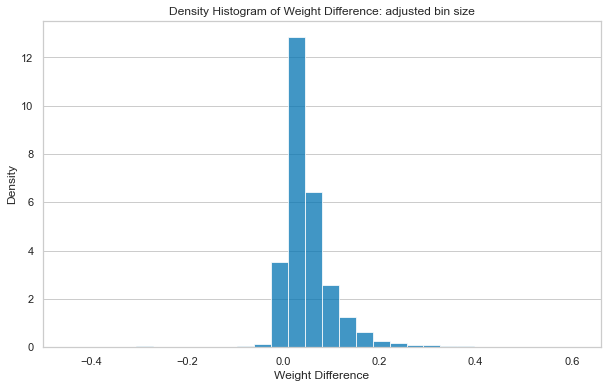

In [54]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df['Weight diff'], bins=30, density=True, alpha=0.75)
axes.set_ylabel("Density")
axes.set_xlabel("Weight Difference")
axes.set_title("Density Histogram of Weight Difference: adjusted bin size")
axes.xaxis.grid(False)
plt.show()

In [55]:
df.Rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

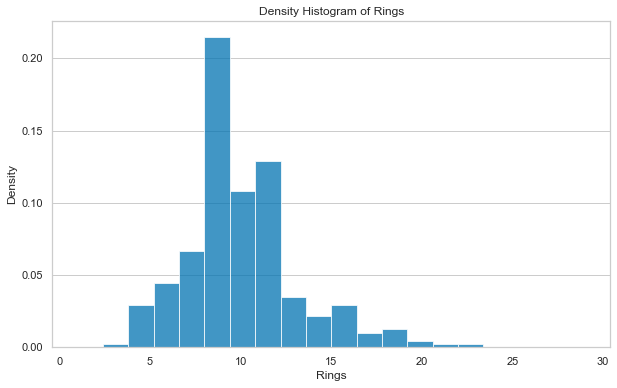

In [57]:
bins = np.arange(min(df.Rings), max(df.Rings) + binwidth, binwidth)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df.Rings, bins=20, density=True, alpha=0.75)
axes.set_ylabel("Density")
axes.set_xlabel("Rings")
axes.set_title("Density Histogram of Rings")
axes.xaxis.grid(False)
plt.show()



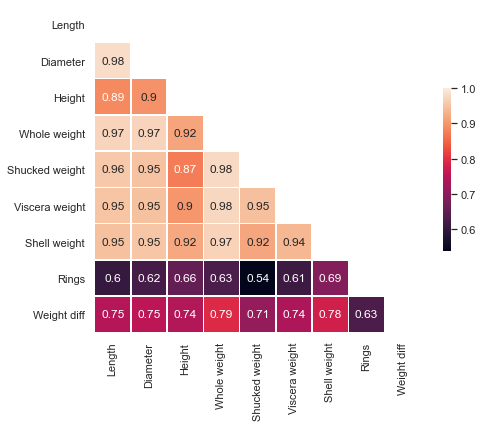

In [58]:
# Taken from the seaborn example at:
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
plt.close()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


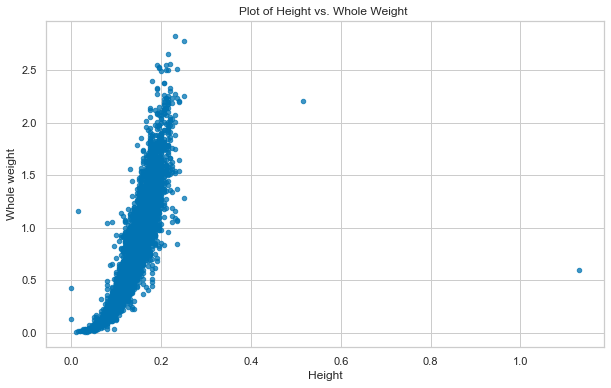

In [59]:
df.plot.scatter("Height", "Whole weight", figsize=(10, 6),
                title="Plot of Height vs. Whole Weight ", alpha=0.75)
plt.show()
plt.close()

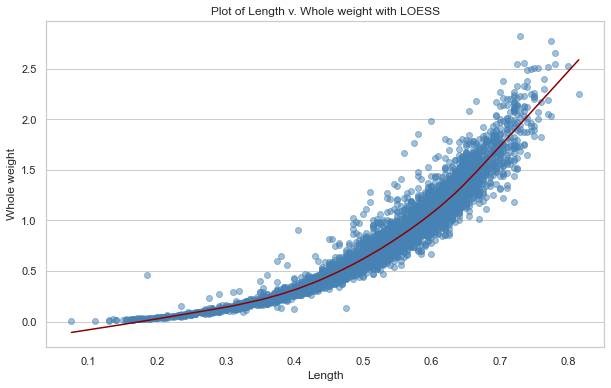

In [60]:


def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):
    import statsmodels.api as sm
    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs(0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="steelblue", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")
    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)
    axes.xaxis.grid(False)
    plt.show()
lowess_scatter(df, "Length", "Whole weight")



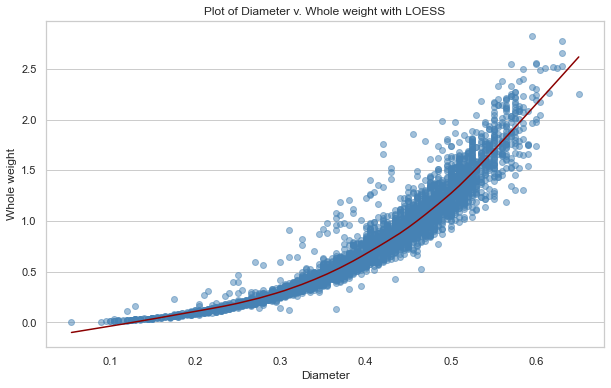

In [61]:
lowess_scatter(df, "Diameter", "Whole weight")

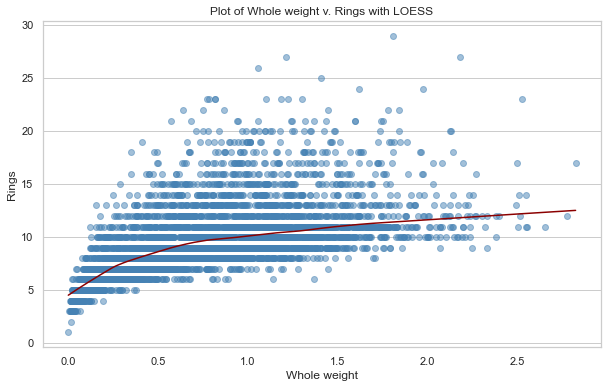

In [62]:
lowess_scatter(df, "Whole weight", "Rings")

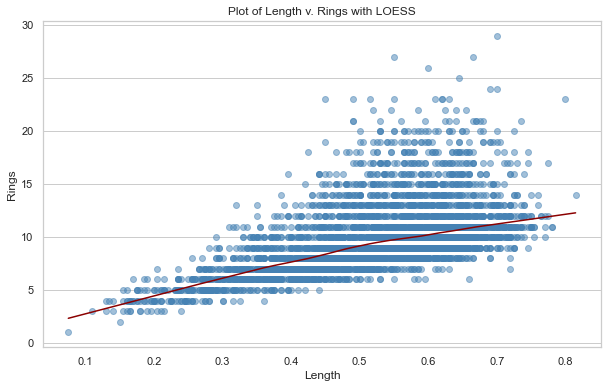

In [63]:
lowess_scatter(df, "Length", "Rings")

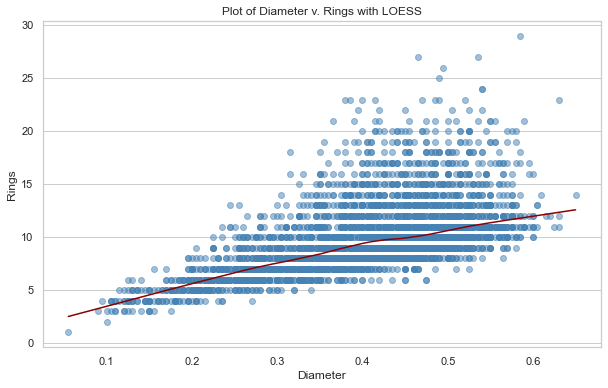

In [64]:
lowess_scatter(df, "Diameter", "Rings")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


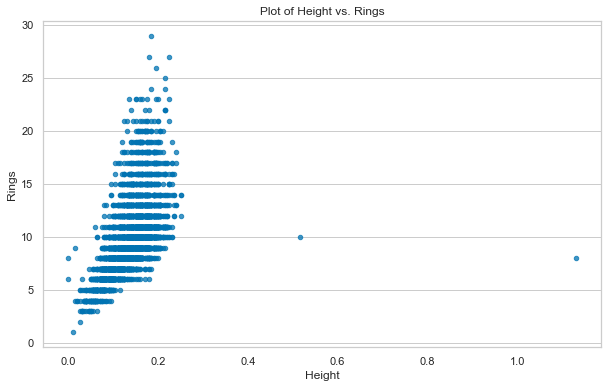

In [65]:
df.plot.scatter("Height", "Rings", figsize=(10, 6),
                title="Plot of Height vs. Rings", alpha=0.75)
axes = plt.gca()
axes.xaxis.grid(False)
plt.show()

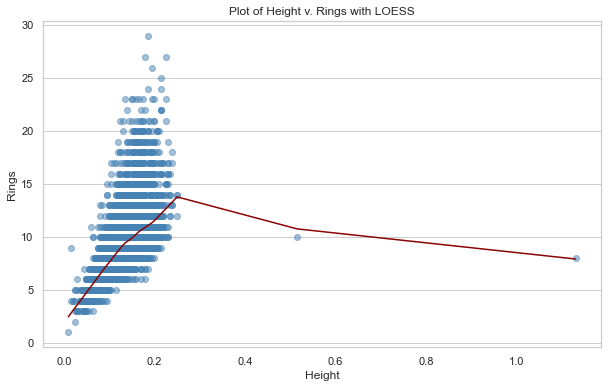

In [66]:
no_outlier_df = df[(df['Height'] > 0) & (df['Height'] < 100)]
lowess_scatter(no_outlier_df, "Height", "Rings")

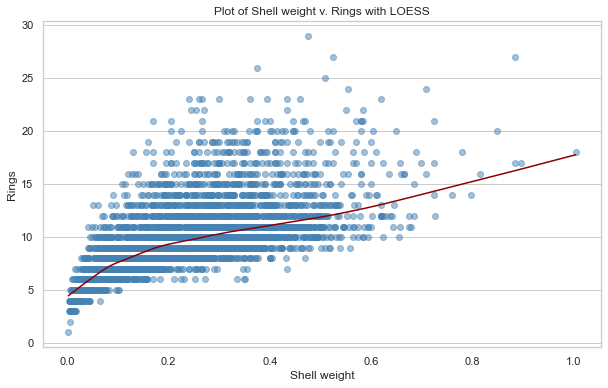

In [67]:
lowess_scatter(df, "Shell weight", "Rings")

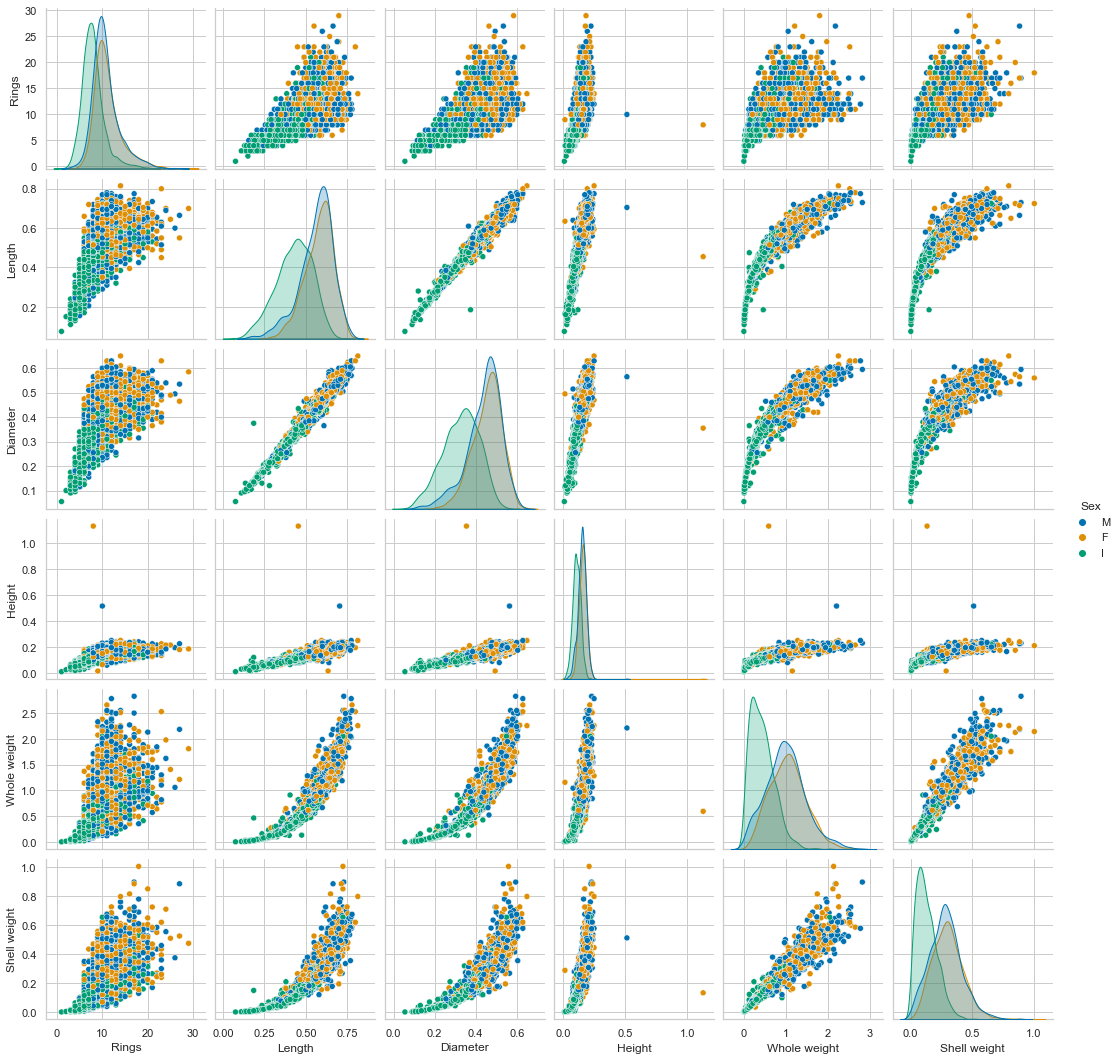

In [71]:


sns.pairplot(no_outlier_df, vars = ['Rings', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'], hue='Sex');



Relationship between sex and rings,length,diameter,height,whole height,shell height.